In [1]:
# Code to enable this notebook to import from libraries
import os
import sys
module_path = os.path.abspath(os.path.join('..\..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import seaborn as sns
import csv
from scripts.mockUtilities import *
from scripts.utilities import *

In [3]:
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pywt
import pywt.data
from sklearn.cluster import SpectralClustering
from matplotlib.colors import ListedColormap
from scipy.sparse import csr_matrix
from scipy.io import mmread
from sklearn.mixture import GaussianMixture
from scripts.cavi_plot_utilities import *
%matplotlib inline

In [4]:
# Set seed for reproducibility
np.random.seed(100)

## Loading WaviFM results

In [5]:
loaded = np.load('idwt_L_meansWaviFM.npz')
idwt_L_means = [loaded[f'arr_{i}'] for i in range(len(loaded.files))]
loaded = np.load('F_meansWaviFM.npz')
F_means = [loaded[f'arr_{i}'] for i in range(len(loaded.files))]

In [6]:
N_FACTORS = len(idwt_L_means)

In [7]:
# Factor matching
factor_order_from_1 = (7,6,9,3,5,8,4,2,1)
factor_order = [i-1 for i in factor_order_from_1]
assert set(factor_order_from_1) == set(range(1,N_FACTORS+1))
idwt_L_means = [idwt_L_means[i] for i in factor_order]
F_means = [F_means[i] for i in factor_order]

## Loading waveST results

In [8]:
# Function to convert DataFrame to list of square matrices
def format_activities(df):
    grid_size = 32
    y_index, x_index = np.divmod(np.arange(grid_size * grid_size), grid_size)
    df.columns = [f'gene_indicator_{i}' for i in range(df.shape[1])]
    df.index = pd.MultiIndex.from_arrays([y_index, x_index], names=['y_index', 'x_index'])
    matrices = []
    for column in df.columns:
        matrix = df[column].unstack().values
        matrices.append(matrix)
    return matrices

In [9]:
waveST_L_0_threshold = format_activities(pd.read_csv('waveST0Threshold.csv', index_col=0))
waveST_L_0_threshold_5 = format_activities(pd.read_csv('waveST0Threshold5.csv', index_col=0))
waveST_L_hybrid = format_activities(pd.read_csv('waveSTHybrid.csv', index_col=0))
waveST_L_hybrid_5 = format_activities(pd.read_csv('waveSTHybrid5.csv', index_col=0))

## Loading ground truth

In [10]:
true_factors = format_activities(pd.read_csv('true_factors.csv', index_col=0))

## Analysis

In [11]:
rb_centred_color_map = create_custom_colormap()

In [12]:
def plot_factors(activities):
    # Plotting stuff
    fig, axes = plt.subplots(3, 3, figsize=(16, 16))

    for i, ax in enumerate(axes.flat):
        flattened_matrix = np.array(activities[i]).flatten()
        matrix_min = flattened_matrix.min()
        matrix_max = flattened_matrix.max()
        norm_min = np.min((matrix_min, 0.0))
        norm_max = np.max((matrix_max, 0.0))
        norm_center = np.max((matrix_min, 0.0))
        if norm_max == norm_center and norm_min == norm_center:
            norm_min -= 1e-10
            norm_max += 1e-10

        if norm_min == norm_center:
            norm_min -= np.abs(norm_max - norm_center) / 10000

        if norm_max == norm_center:
            norm_max += np.abs(norm_min - norm_center) / 10000

        norm = TwoSlopeNorm(vmin=norm_min, vcenter=norm_center, vmax=norm_max)
        
        im = ax.imshow(activities[i], cmap=rb_centred_color_map, origin="lower", norm=norm)
        ax.set_xticks(np.append(np.arange(0, 32, 8), 31))
        ax.set_yticks(np.append(np.arange(0, 32, 8), 31))
        ax.set_xlabel('Horizontal ordinate', fontsize=24)
        ax.set_ylabel('Vertical ordinate', fontsize=24)
        ax.set_title(f'Factor {i}', fontsize=24)
        # cbar = fig.colorbar(im, ax=ax)
        # cbar.set_ticks([norm_min, norm_min/2, 0, norm_max/2, norm_max])
        # cbar.ax.tick_params(labelsize=16)
        
        ax.tick_params(axis='both', which='major', labelsize=16)
    plt.subplots_adjust(wspace=0.25, hspace=0.4)
    plt.show()

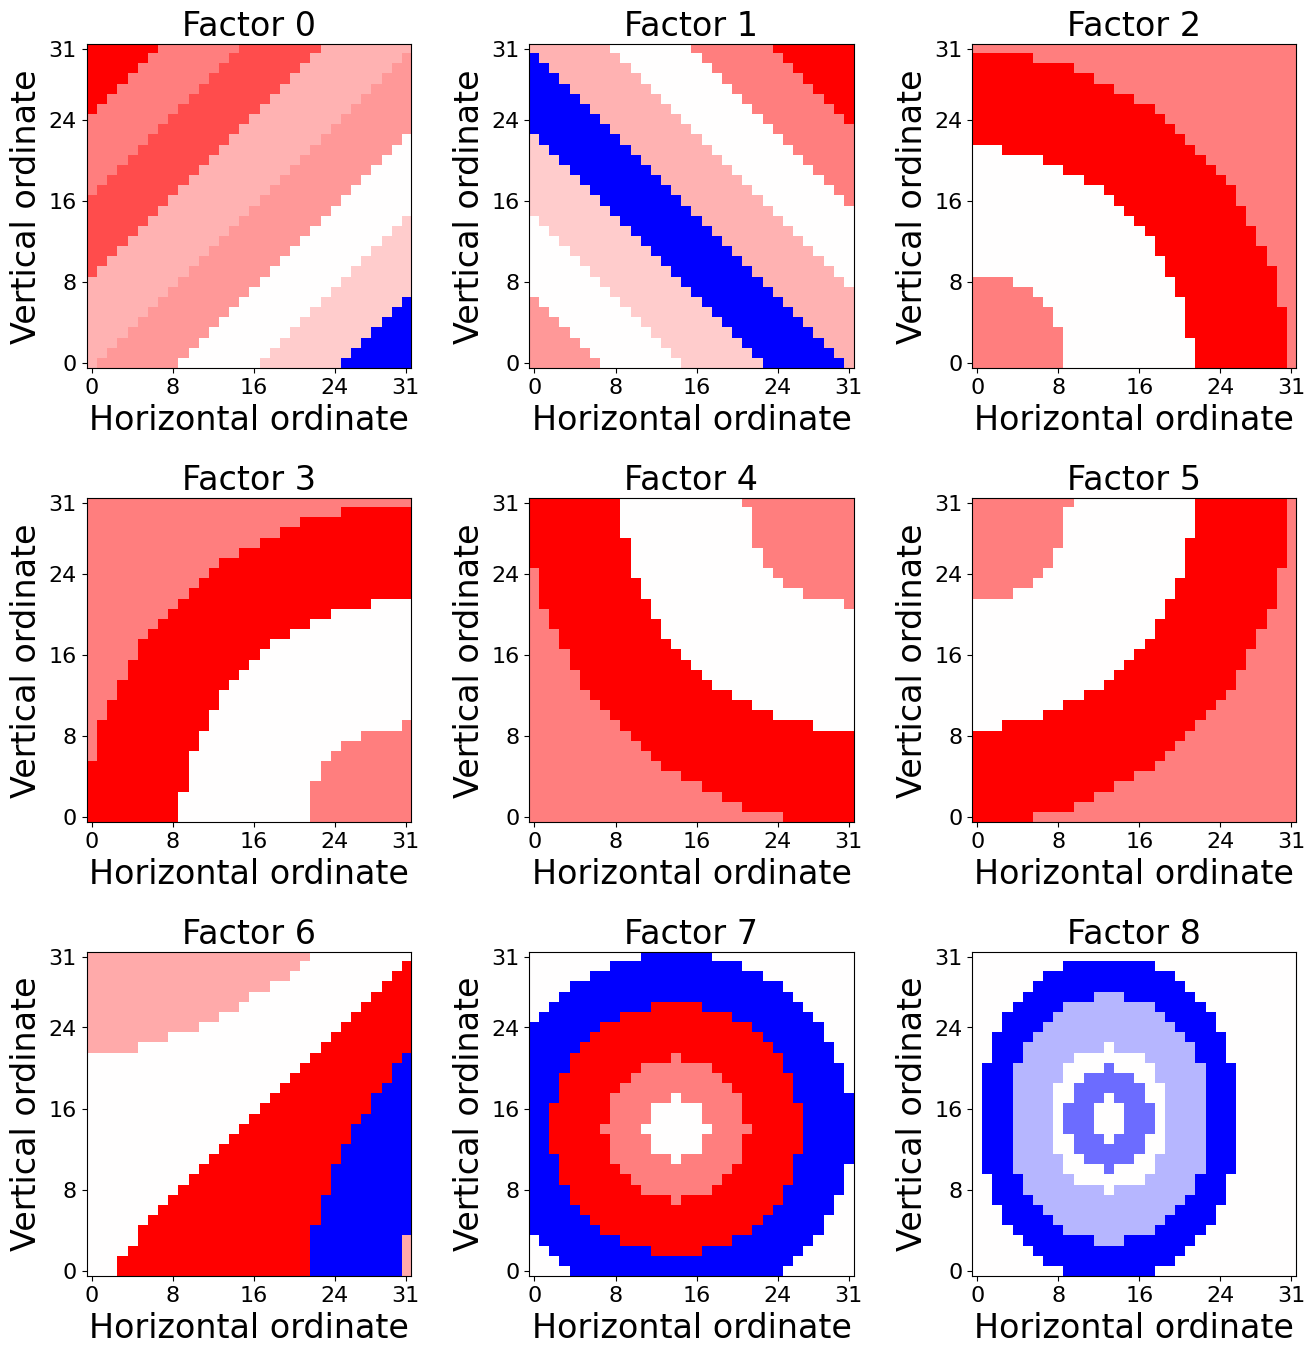

In [13]:
plot_factors(true_factors)

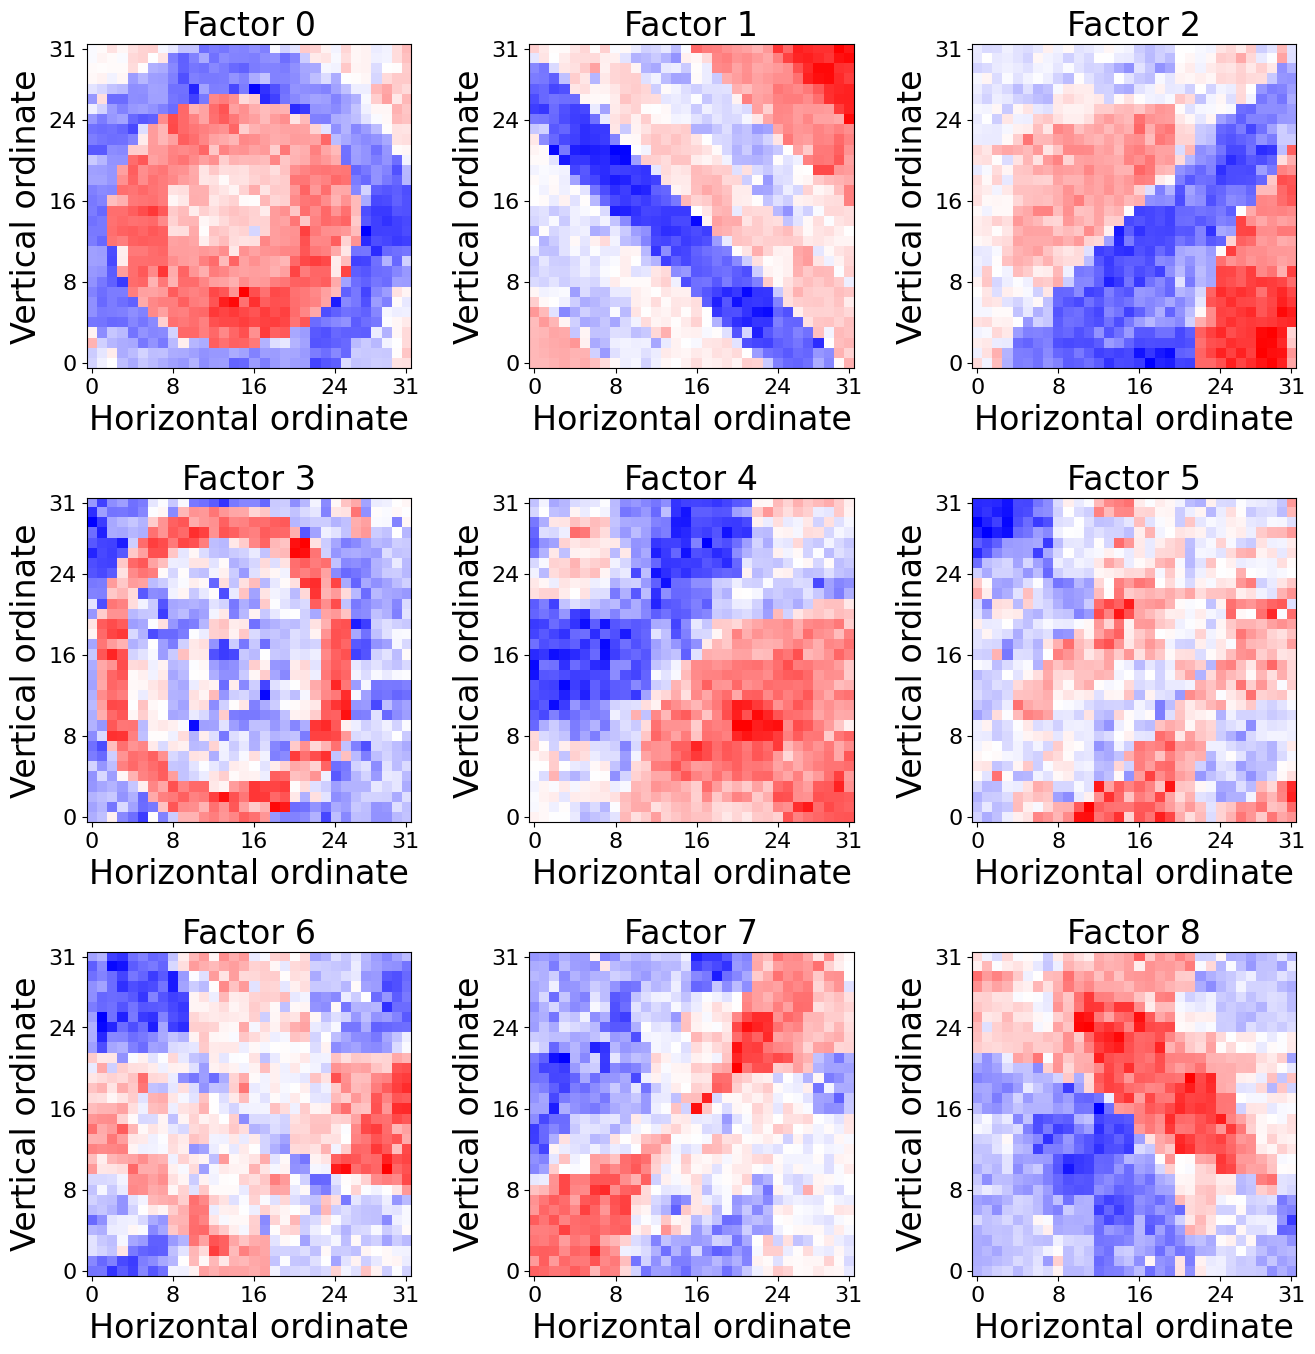

In [14]:
plot_factors(idwt_L_means)

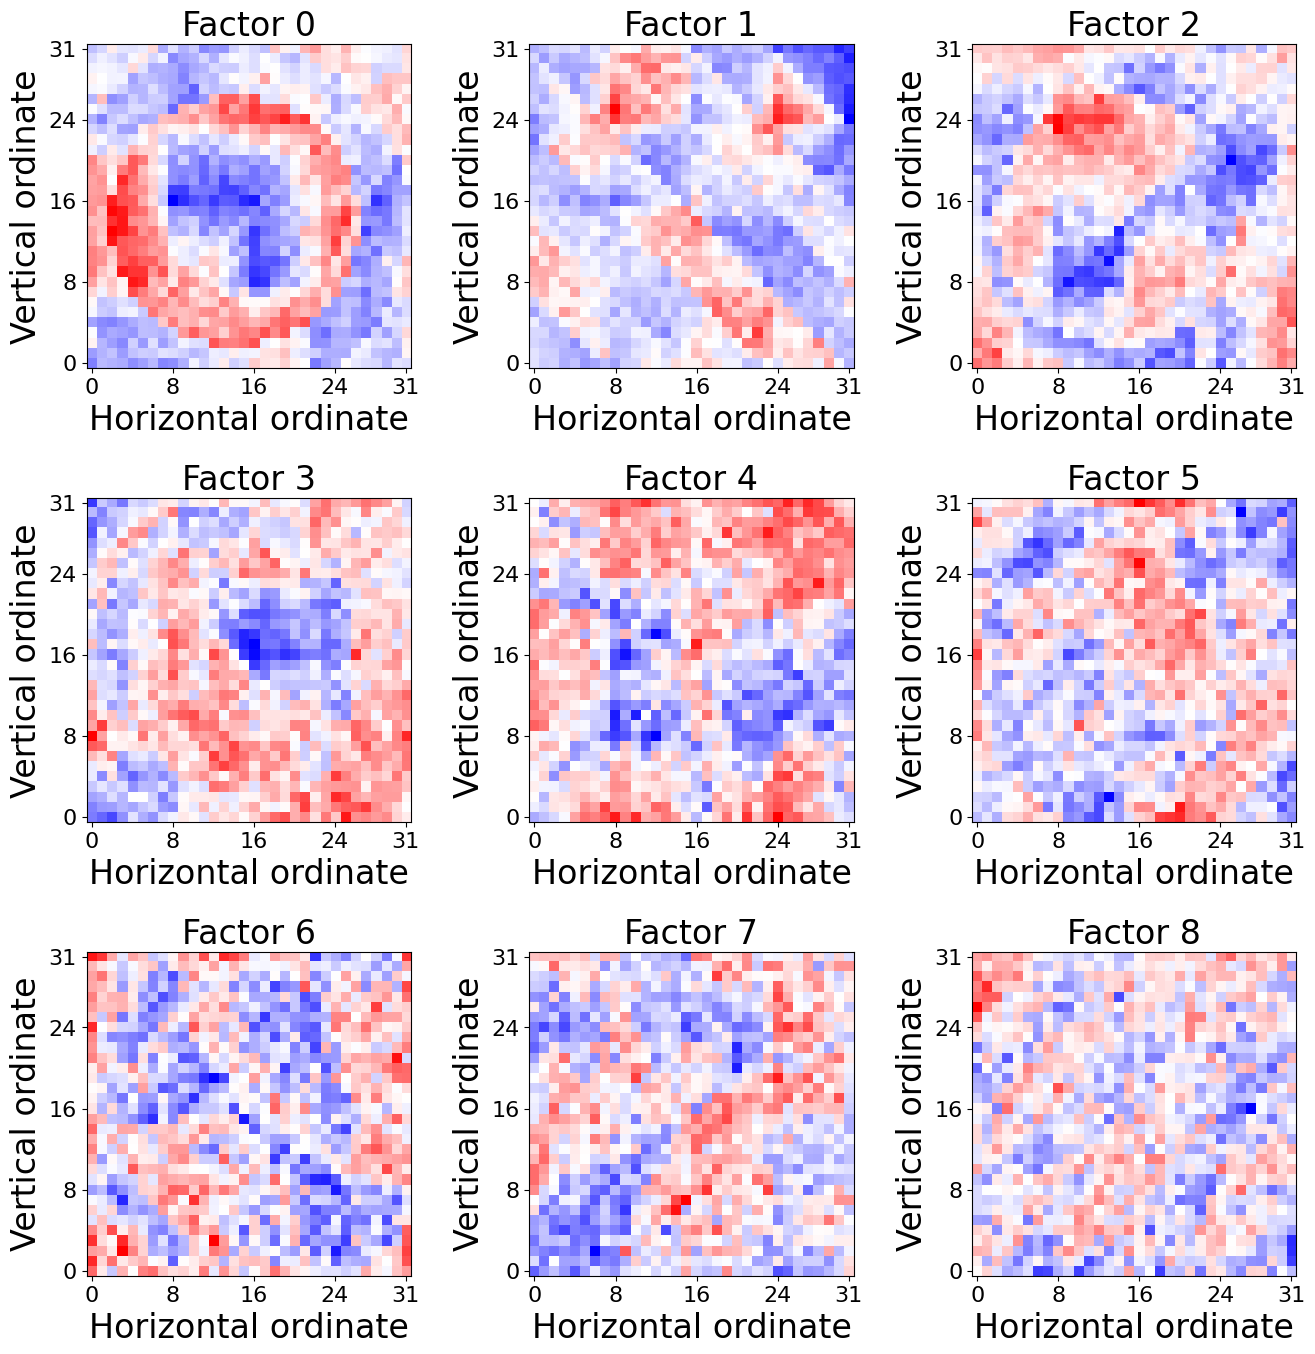

In [15]:
plot_factors(waveST_L_0_threshold)

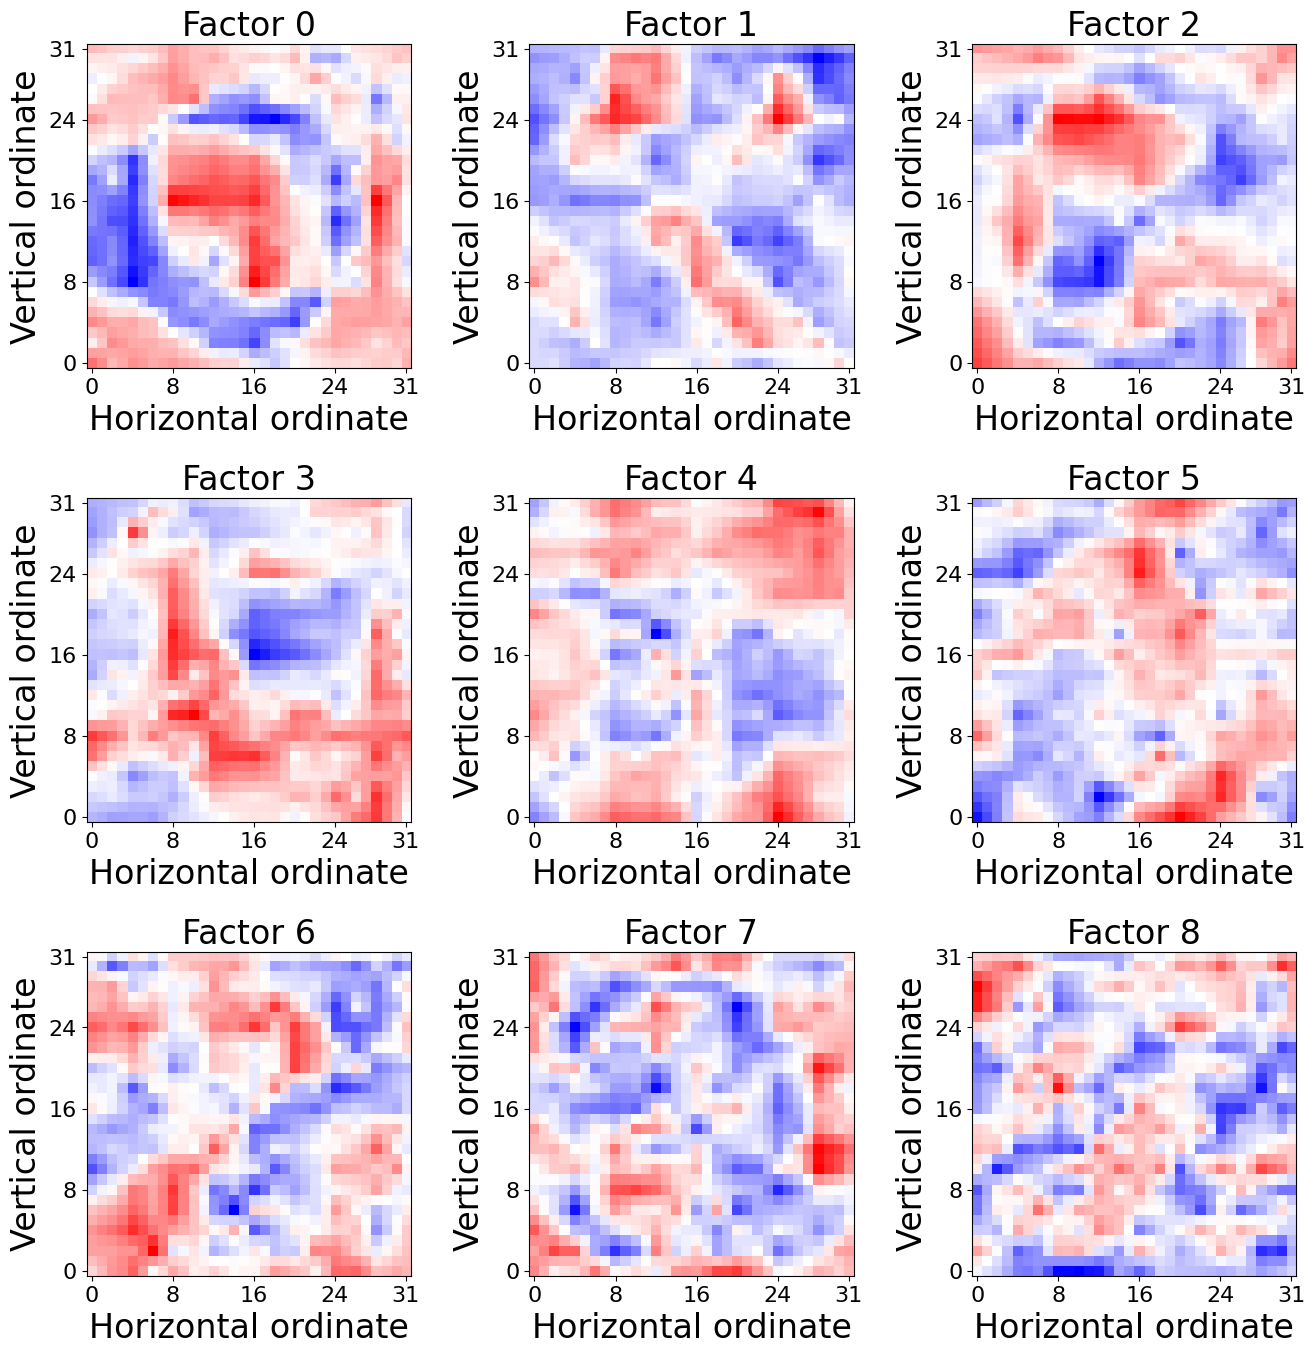

In [16]:
plot_factors(waveST_L_hybrid)

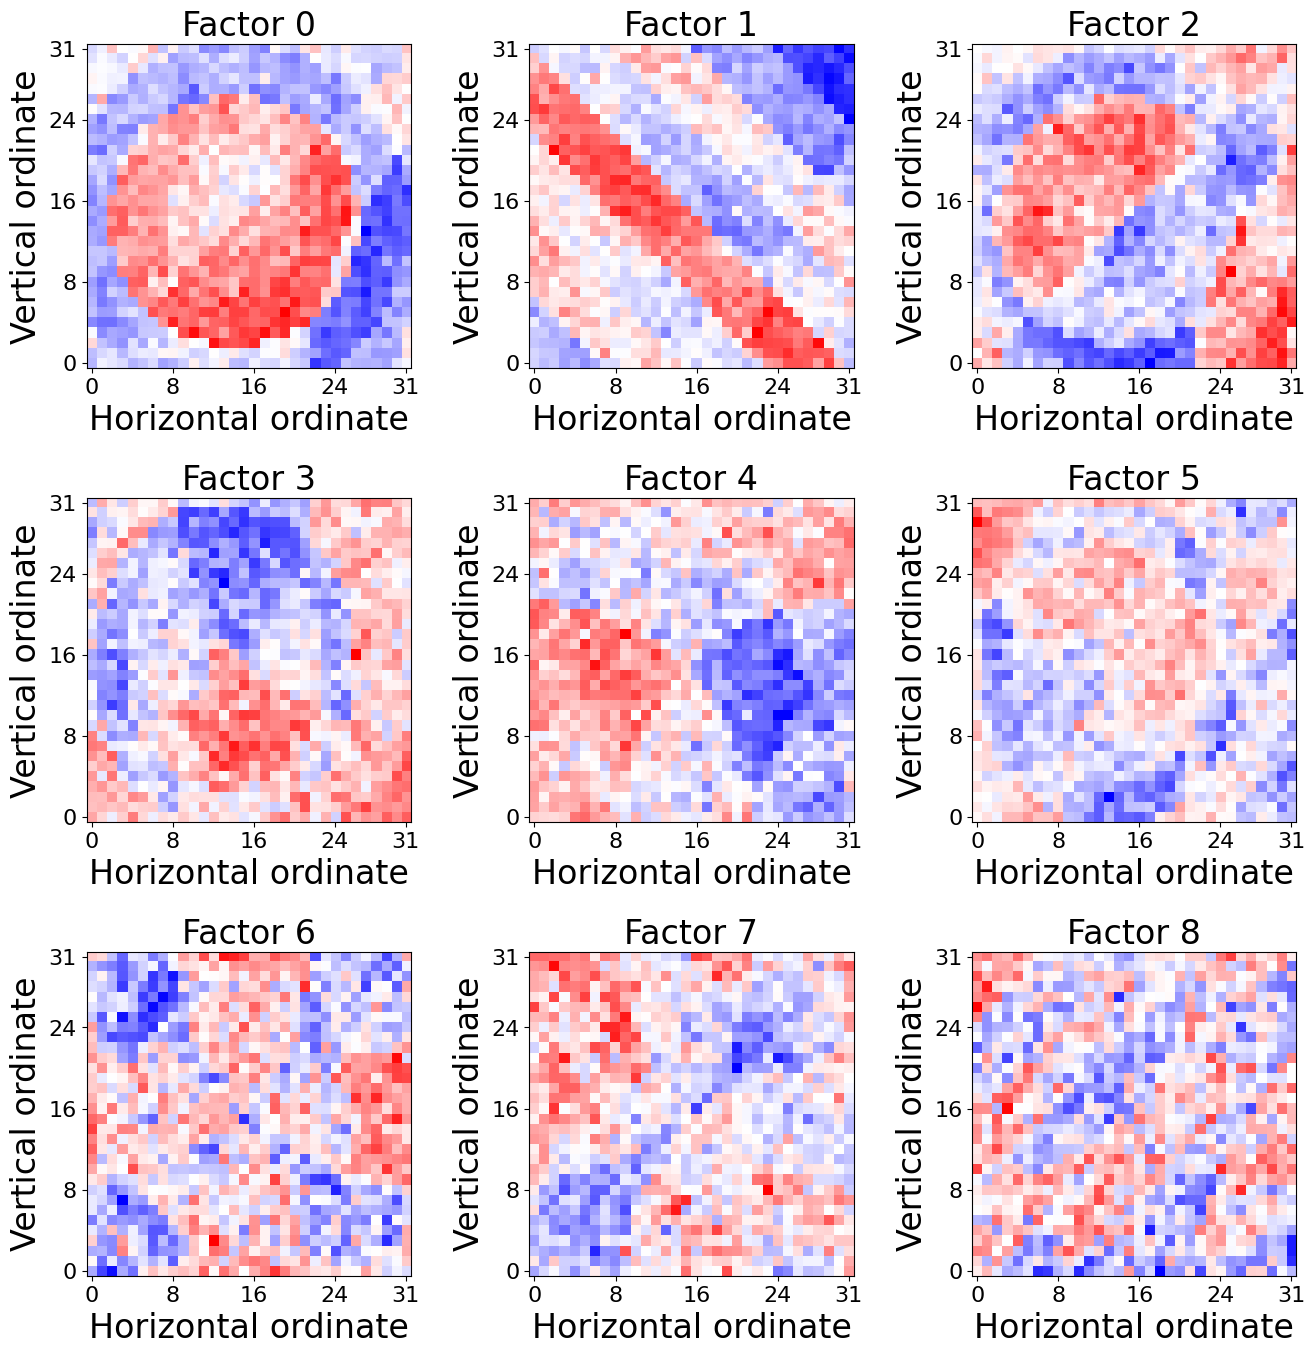

In [17]:
plot_factors(waveST_L_0_threshold_5)

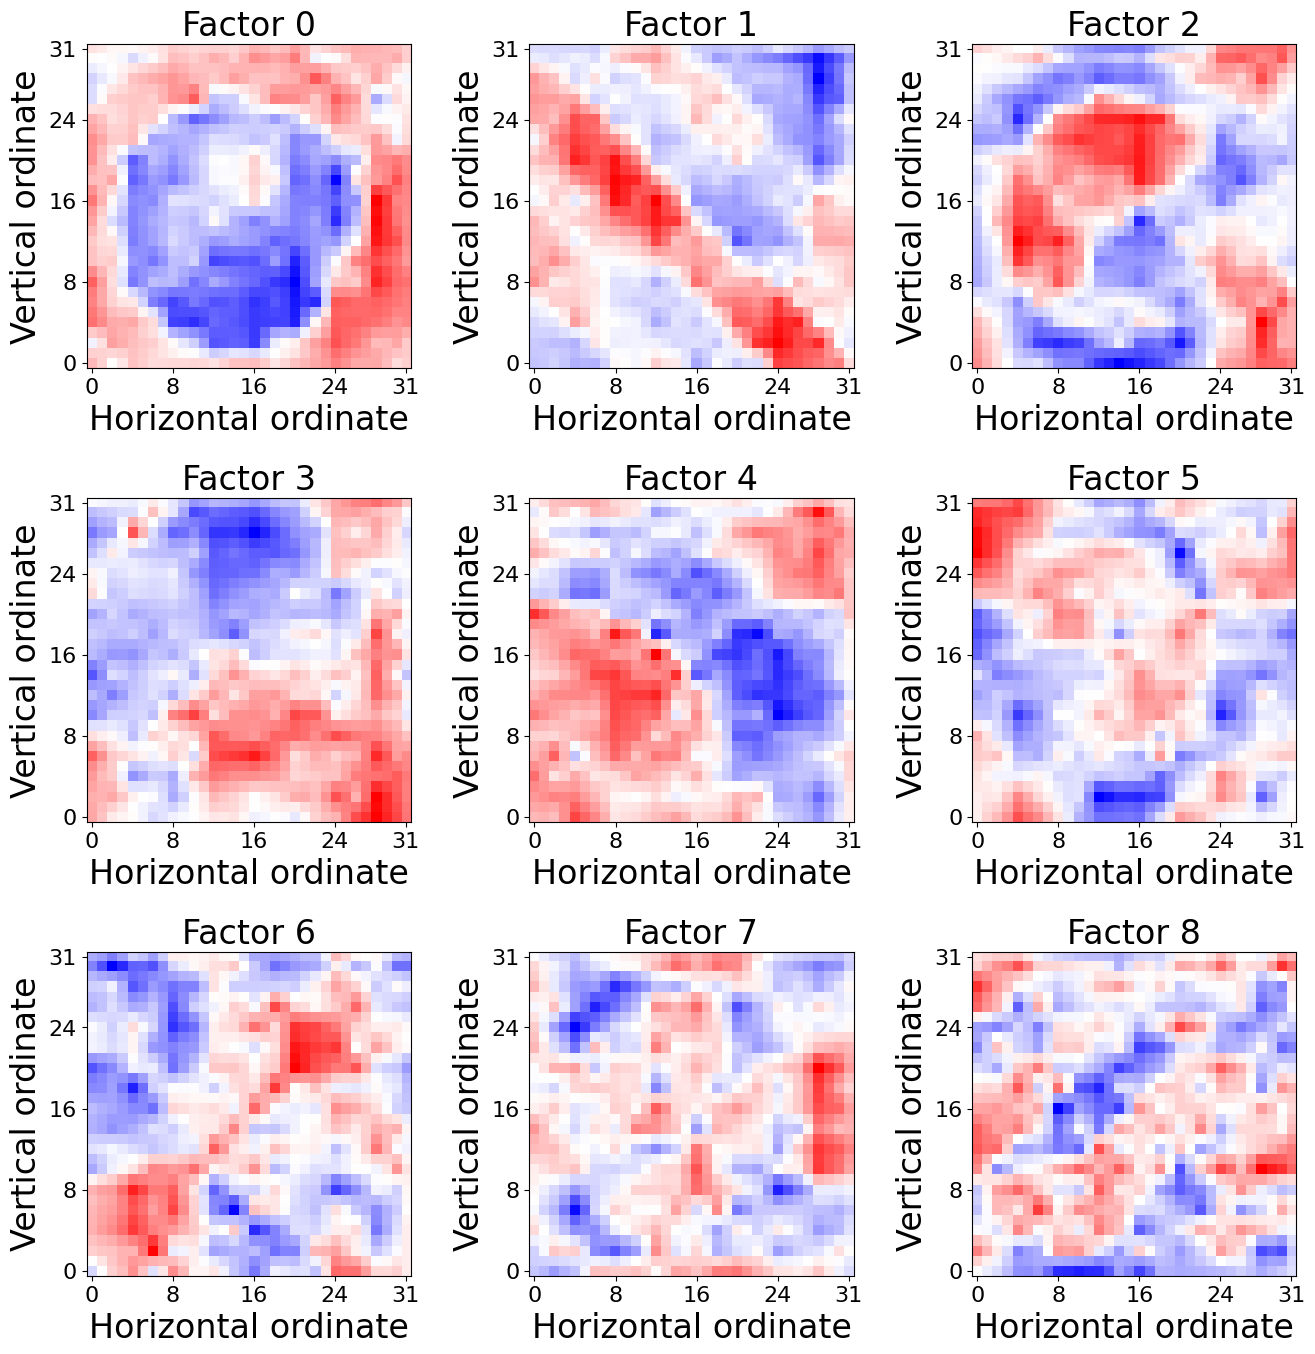

In [18]:
plot_factors(waveST_L_hybrid_5)